In [ ]:
# %pip install -q ultralytics
# %pip install py-cpuinfo

In [10]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [2]:
result = model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25,
   device='cpu'
)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/saplab/thaiminhpv/EFISS/AI-model-query-service/trainer/notebooks/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 60.5ms
Speed: 1.2ms preprocess, 60.5ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 384)


In [11]:
import cv2
a = result[0].plot()
b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [15]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58:

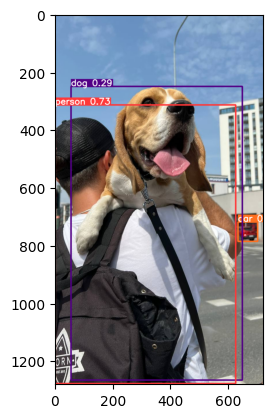

In [12]:
import matplotlib.pyplot as plt
plt.imshow(b)

In [1]:
%cd ../..

/home/saplab/thaiminhpv/EFISS/AI-model-query-service


In [4]:
with open('./database_info.txt', 'r') as f:
    for line in f.readlines():
        print(line)
        img = line.strip()
        break


data/shopee/resize_600x600/shopee-137kidsluxuryforkids/6462d673614eb20545373485_0_shopee_137kidsluxuryforkids.jpeg



In [13]:
import cv2

result = model.predict(
   source=img,
   conf=0.25,
   device='cpu'
)[0].plot()
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


image 1/1 /home/saplab/thaiminhpv/EFISS/AI-model-query-service/data/shopee/resize_600x600/shopee-137kidsluxuryforkids/6462d673614eb20545373485_0_shopee_137kidsluxuryforkids.jpeg: 640x640 1 person, 39.9ms
Speed: 1.8ms preprocess, 39.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


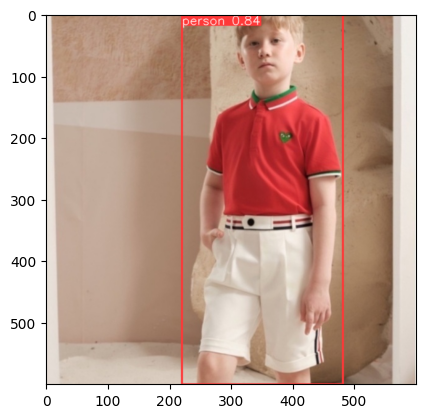

In [15]:
import matplotlib.pyplot as plt
plt.imshow(result)